In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
## Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

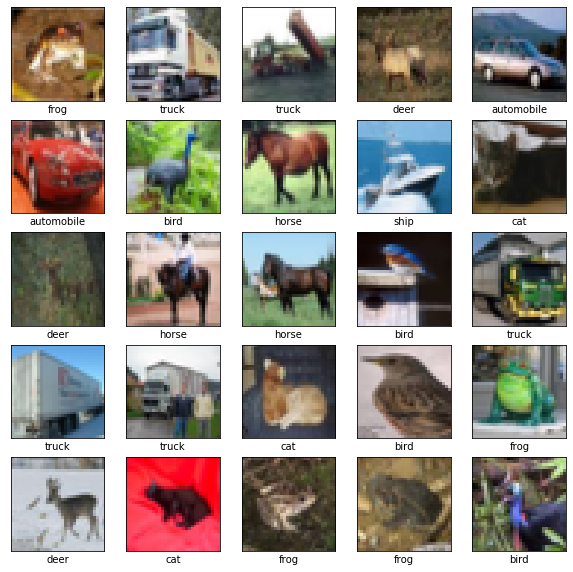

In [4]:
class_names =  ['airplane', 'automobile', 
               'bird', 'cat', 'deer', 'dog',
               'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=len(class_names))
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=len(class_names))

### Neural Net

In [20]:
## Neural net
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPool2D(2, 2))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, 2))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)             

In [21]:
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'], 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [22]:
model.fit(train_images, train_labels,
          validation_data=(test_images, test_labels),
          epochs=20, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 20s 402us/sample - loss: 1.6519 - accuracy: 0.3991 - val_loss: 1.3600 - val_accuracy: 0.5067
Epoch 2/20
50000/50000 [==============================] - 19s 375us/sample - loss: 1.3208 - accuracy: 0.5288 - val_loss: 1.2118 - val_accuracy: 0.5653
Epoch 3/20
50000/50000 [==============================] - 25s 495us/sample - loss: 1.1809 - accuracy: 0.5792 - val_loss: 1.1308 - val_accuracy: 0.5986
Epoch 4/20
50000/50000 [==============================] - 25s 494us/sample - loss: 1.0817 - accuracy: 0.6192 - val_loss: 1.0267 - val_accuracy: 0.6390
Epoch 5/20
50000/50000 [==============================] - 25s 494us/sample - loss: 1.0107 - accuracy: 0.6443 - val_loss: 0.9749 - val_accuracy: 0.6611
Epoch 6/20
50000/50000 [==============================] - 25s 493us/sample - loss: 0.9519 - accuracy: 0.6682 - val_loss: 0.9792 - val_accuracy: 0.6589
Epoch 7/20
50000/50000 [====================

10000/1 - 2s - loss: 1.0005 - accuracy: 0.7465


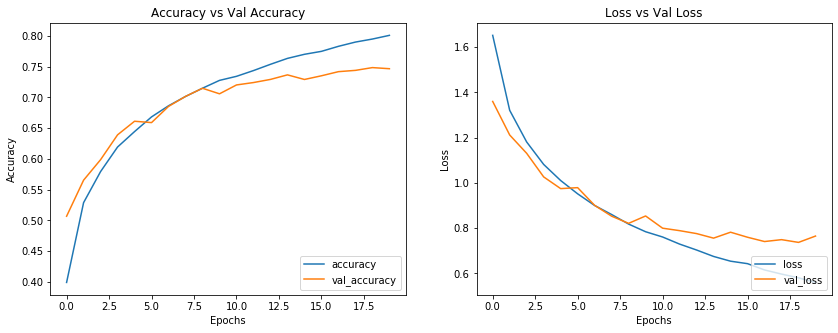

In [35]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Val Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Val Loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')


test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Real-world test

In [24]:
import cv2
import numpy as np

In [25]:
def _predict(img_url, img_name):
    test_img = tf.keras.utils.get_file(img_name, img_url)
    
    ## Read image
    test_img = cv2.imread(test_img)
    plt.imshow(test_img)
    print('Shape of Image before reprocessing: ', test_img.shape)
    
    ## Resize to (32, 32) since that is the input the model takes
    test_img = cv2.resize(test_img, (32, 32))
    print('Shape after resizing: ', test_img.shape)
    
    ## Normalize
    test_img = test_img / 255.0
    
    ## Reshape to (1, w, h c)
    test_img = np.expand_dims(test_img, axis=0)
    
    ## Predict!
    preds = model.predict(test_img)
    return class_names[np.argmax(preds[0])].upper()

Shape of Image before reprocessing:  (480, 800, 3)
Shape after resizing:  (32, 32, 3)


'AIRPLANE'

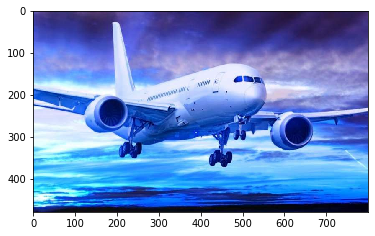

In [26]:
_predict('https://scx1.b-cdn.net/csz/news/800/2019/toomanyairpl.jpg', 'airplane.jpg')

Shape of Image before reprocessing:  (159, 318, 3)
Shape after resizing:  (32, 32, 3)


'DEER'

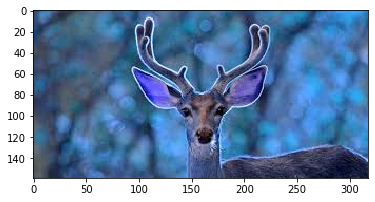

In [27]:
_predict('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSExMVFhUXFxcYGRcVFRUXFxcYFxcXGBUXFxYYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGy0mHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAJ8BPgMBIgACEQEDEQH/xAAbAAADAQEBAQEAAAAAAAAAAAADBAUGAgEAB//EAD8QAAEEAQIEBAMFBAkEAwAAAAEAAgMRBCExBRJBURMiYXEGgZEUMqGx8CNCUmIzU3JzkqLB0eEVgrLxQ2PC/8QAGgEAAwEBAQEAAAAAAAAAAAAAAgMEAQAFBv/EACgRAAMAAgIBBAICAgMAAAAAAAABAgMREiExBBMiQVFhMnEFsUKRof/aAAwDAQACEQMRAD8AjcJYC4WtBJI1qykWVyG0TL4kX6NC8q8XN7PVmtI84hnGyAofiuJVSPBcd0ZuEAdlVNJdIlrbFsXBJ1KqxYtbL2JPMopdZXvRin7OGsIXTI+YrqVyYwwl1blDJ7Z34NBSc40bVrJutFPdw8v1OynnK99j2vwKYeRruvuIP01XkuFyajol5JebQpnGa+SM/TOeFG3G1p8DhEkoJYxzq35QSlOG8Fd4QmLomMcTyB7w1z60JaD0uxZrZcfGnGZMZsGPE4sqJsjuXyl0j9bJG5A5QPZMiHb/AAd7ilH0kJaTofUHQj5IgfoqubMZYMed9c8sILz/ABOa4s5j6kNCz75VzpI6vyDnfqksh+uiZl1Xgx7IQvKktgILw5lKk99BeY0YCHkC3Ad1Isqtjn0gbpESPLB0RJYm1VD/AF+qmDRxF/ronYqTQLlrsJmzEXXySDJi7RN5ESJgYw3RaS7Yt0yXkQFIiajS1mdh+XRZVmDJJO2KNpc95oAdf9gBZv0VMOaRm2WuGixaphoS8HBXxtJbLDKWi3sieXOaB940QOYDqW3SbxuHzObzNbodQC5oc4d2NJtw9gkZMbGqjtsgXnJzFJBx9keHJASKnjPXk1dvsa+zUvvKl5+IDuoeZxSr7KfhktdhtpDfFZB0SvB8WySVNGYXuV/h7HNANqqYc4+IM91sqtxwBdbI8cwtIeM4lFaHdlJa0tFSf4LEU99AmWyVqs9DmkaFPvyfL7qa4rwFzGps0KTlzm0s6U8yT4jLVaqlYNITeTZnMglyrcMxNBamjRPY+TQ0K9ZQ+BE6XIoTOAQS+181t76rzlSuo/sxrZ9eqYgckpHLls6Y3sBSUX0UXGlrdTo57RmuQa30GlouxEFNNLQKUKPIrqvXcQ03SL9O9dD5tH3GZAAaWYkkN7qlnzWLSGNHzao8UOJ7At7H/j3IeH47Wk8n2WDlA2osF/5uZSviWYukgaSSWwQA335A4D8Wj5LX8SwmyNwnuGggc13qI5ZBV+oISPDMhuXHkmWKMRxNYWP5Wtc2XxGshaHgWQRzAtJOjQrovWNP9C3O60VuP/s3Qwf1OPEw/wBot53H/P8Ago7jZTfxhKTnZA7SV9AB/olIW2oGwvLGIo7XeQKXN18l5JMEni6fYfg4Zn0aK+kyr1B13SkjbPYd0pIHXpZvsmR6eZZm2ylPxWho3X30S2K4k31K6x+HuItU8XC5dwj4qfBr5PyfRYhKegxaR4jSIXhKyJsKYQvls0Ufhr+Wd4b998MrGHs4gGh2sNcPmq2W+wa2WUmyTHPE4dJGH6OCb6fwZSSYH4PDvtrC5zqY2WQgbuDGOtnpe3taocV4y3LDzG0smZyuaWl2oaQKok8pAqiK2U/NJh4iXM/cyAANNQX8rm/NriPmi/ZRDxB8Tf4ywab2apely09/om47Wv2aLjAqR5/mP16/ioks1jdV/iKUGV4H8bvzUCRvReVjl+ShvsVyMkjTdcxYL5Na0TOJjW6lsuH4IAGiO8vDwbEcjN4HCQDsrsWNyhN5GO0bJDxiDRQcnQz+I/DiA6osjNEtjz6In2m9FJeFutj5a0BfiA67HX5r0toUU3zAalTsnIpHMNvRlfFC8wo2p8nmJTcsl6IIirZXzO1oldaZBlavIibXQsrqIaq1taI9PY2x7qXxyEePZI5DN1NMS32NbZ86a0RrbCDBAU82MgIqS+jZQvsmI3XouXtXzFvBGNhyNEDkRbXD5aR10he9sUyj0RMNtIT2E60vASApM1clpDk9GjziX4ILTrHJI2uwe1rhr7h+qz75Xtwoo7oDIe5/9vw2iO73Ap/zKq/DuUH+JiuNCVvk/vW6s9rBcPmErjQtIkgltoJBs3bXtJ117E0fmnYPpP6Ce3O0V/idvNmSydJBE8ez4oykjKGhO/EkD2Q4sxF3EIXEa26EkNN+rC3/AAnsoQcXKfi29GvSPZsyyUFuQbRpMIkI8GGB0TOHQvYQi22FUxoQ1jQN6slTJoyG6FDwOJ6hjulAH2S6T0Px5Fvs1EGJsusiFd8OksJqXVI5PZQ5TRDncQkxMSaVfIjCTMITuaS7EOXs+fL5VmMxnPkRMG7pYx9XgFaHJfTTolPhzhjnTfa3/cZzBl6c0hFW0dWtBJJ70swJuujroNDwjxsx0ztImyukJ6nlfzNaPegPmUpiHxeIGc6tYXSu/wC3UD5vLR80/wAZ4qGM8KN3vX/iB7rjGxPAiLXf0r6Mmv3QL5I/fUl3rQ6K31FpLS/oVhn7Jk7y5xJ3Nk+6FJGdkYA2SuoRZSU9IJz2U+E4IG4V4NoIHCgC3VOTs0UN1uuyuJ+PQhO5JPj1R5zSAXWqJS0TV5Bu0XWNJquxDzLieMtGiCmvAxb8lEAHRTc7F6hdYuQeqquI5fkp1keOxj+cmVxoiXK1HhULS2jXj1V+L7opegsi1sm9vZ+dsIQ3Po2vo4iUOSAhPVLQh7GGTuKYjjvQpeNuyZilAKVVfg1fsdhhACK5o6JB2Su2ymkpcthukdvYhFlIsbu6G8nr+Cpmn9iWCc+1zDASVRjxgG2d184NsUaS82XU9DJxvywUUfdcswXTPEcYBcb3NAAAkknoABuu8hnYo/A8gRztL9GODo3nqGyDlLvlYPyU0afbNpd6I/EODTwHme3y35ZGkPjNfwvbY+R19FX5ftTS9orJaLcOkwAALm9n7W3ruNVy6HIx3SBkhY9ri2RgAfG8g7OjOjhsRY2IKLBlsf8A0kBheP8A5cU8zQQd3Y7iHMr+Qn0CdTpvaLK9JeNbXaYLhPxE5jHQzN8SB2j43E6Hu07tdsQVRxeGRSa4kok6+FIQ2dvy2kHq36IeRw0TNL5aeNvtUGr66faIHU7tZIaRtZWd4rwOeEeIHNfH+7LGSWX0vTmid6OATVU0++mSVLXg0U0BB5XNII3BBBHuCiYmJzB73OZHGwW+R5Ia2zQGgJLj0A1Urg/xnI39lmN8eMbF9+Iz1bIPN9bXfHuJQ5MmPhQczYHzML3O3LnkNBJ2oNND69VrmvvwAkmP8TxeQAW1wLQ5rmm2ua4W1wvoQsrI3zrZcceDJIAKaw+G1v8ACyPyNH0b+KzJj86nm1SCcF7h+SWtGtqphTeI9rbqzV9u5pSIo/KF8yUsc1/VpB+h2QtSOimh0ZkcrHSQuc5rX8jg5vK5p1qwCdDR19Fxjlz3crAXOPQCypGFPFi5WTC8nwnu1DfvNohzOho7g+5X3FPifeHGaY4zuQDbh/E95Nu9tk2vTOn14FvLryV8+TGgF5Dw939Uw2PZ7+vs36qHmfEUs7g1jdDQaxoN10DQNmhJQ8Fe8CSU+HH0LhzPf/dsu3e5Ib6omRLJG0tx2shaRRlfUszx9OVg/lA+fUviJhfD/sxKrfYXFcYj4nkMl/0r3cuPCbP3Xn+ml/uw7l9Ts/gwska4x5Alc0FzhyOaCBq4tcTZI31A0v2WYxMATyHnkkkfsTISaHYX00Wg+DIadkmqDAIxppbydPXytf8AUILmVLpj/bpaA5ZLQvOHv5nJv4iioCkDhkFUp1W52Y50zWYJoCkXLm0SmK8gIk7OYaqOp2ylP4k182pXTa6o0WIbtElx/RYsuq0K4fZ7jPC5yWg2krIKoYg5t0WafsKe+iVDEQUXKzS1tK79j0Wa41jkHTZbOrfZ1S5Qgx5e61XxM97NDr7pTAxaFrud2qpXfSEtueybjxgi0DK0NL2PJoBJ5U9nRHEU778CnS4g3S6o0b7CWrVOwMVilE9VoJEmHOACXIpdwt7rnKXYKezpsqKzugZDQBaAcgoKX2EvwVJckELvCwy4g0p0LSXN7Wtlw6qCmy/EsxfInT4lDZTp4FqcwClns14SpXWwcs6Z3Ln80bZzq6IMhnFfeb92CW+9AMPqG90XwGP87a9+v61UTF4mIpSXtL4ntMcrBu6N29fzDQj1CY4eXQSmEnmbQcx4vlkY4eSQe437EOHRN7XZ7P8Ajc/OPafleP6L0BLCHNcQ4bHqPmE9BMwXIXNiNeZ50jN7+IKpoOvmrl7gbpVsVi13FCHBzHUQ4EEdwRR/Ap2lXVHeq9NLTqPIrx34TYTzMYIpHbMv9jL1/ZPGjCe22o2WWysBzdQ0gg+YVRFb+xGv1UzhvFMnAldDzOdG0lpjf5mEA6ENO2mulHXQrbScRhy4vFiNSNAD2O1IH7rr/eFjls67X3Jwqh8a7R4VJPteR/mbl4/jt1mY0CUVq9oGktdxsfr0WTyhyvHul4uJyQPHguIc02XA3y1RIPT/ALeov56HiPDvtREmOY3cwDgxrwHXQ5gGHYX06JOWFD6+zZbqTvEeKCo4UQYHT7ltiMaavrU+zRrfqEgzEMA/buYx2nk5gSN/vEaDoeuij8Q4+6Q22vDYA3ks/d7jS9dTfXshw4W63XgK71PXkBPw/wDaXfM46u1snms0Nb1vej1VrD4Y1jjzAOkb0P3IyNhX7zxWp2Gws6pXg2bG3nyJXgMZ907lzzYYGj97W3enKbXHw/kvkje94LS55po3ayhytH+/UklWUuVKfr7/AH+hWNdb+xzLkJcSTzbXdGv1qlnYYeNfzRGRHbYev/CaEYbuVrZ6MYlKJWU5mOwvAANUKAsmu66+G8trMVpcfNK98p03AcY2/wDg/wDxKP8AFM/O4RsFnYBoskuIAA72fzSnFcjllbjsILYGNhsHRzmlzpXfOR7x7AJGSea0DmycNGg4hlCRwA1AN2ncQaKfwjHsKlM3lFJOkuhG2+2MsyFQxhai4bbVzEgU+RJDcabHI4iu5I9EeMUhZUlLysu+W0VcSNms7LjEm1pGkFr6HD1tXza4fIRpp9FNk4LVn+It5iQqGQOUaIcEIO+6WrmexlPfQpHEQ1J5W60M2LooWVHRVXps034I/US0Yps5RYG6oTGJmN1L0q6J0kwhZqmINkkcjVO4r7CyG/sXaOy00hOfyphzgEnkvtA8rVaBSBT5PMmcSC0jDAS5aXhkNDZMyUkg4R5FBXRN4U5bonmQAhBkiAuuqkdKuiiU5ex6A84t23ZJ8SwWkGtNNCEOLJ5RylezZlj0U9Np9DXctdmQyIyCQVV4OGzxtxnlrJGX9nkJAHmPM6B5/hcSS0nZxPdAym2Se6E2MWnutzoTjyVitVLNHgxyNBY7ma9tgtNgiu4Rbf0J+oP4LrhPHQQGTsLwAA2VteIAOjr0kAHfXTdUxPinzGQtP80Tr/y2Ec1KXZ679erXek/6JM3D4sjSUN5q32d6LNS4oxpHthc48zS12vQOBFeoIadfbqtnkY8Ep0leL2LYtB0/eIIHsFkuIwR48zi8OeWlwAY0uJBHTTQEAGz3VE5JtcUeXlWq5COVjO8M9b116+axQOiFFink2v2vfp+incriEWVEQ2N0cobzNb3Avpeo8pS3Bs2UnwnDl9SPzVeKUun5Istbe0HGE83ZoafX/dTmRkPc2wL2H/PRWeN5RjboQTrXbTegoXCpaJycgEtaLArS+hR5ZWtMXFPfRxi+SVrZB5Oa/Y9/x/FamXIBI8N7qr5H3+ayc/HHTyuDo2aVrG5rgGkaCx97p17rf8N4VAyFks7SXOALGMIDqr+kcHA00/u6a3eymuljXZVirb2iRNK7o4k1qACP+UnPA8+Yg83Ycx/Nat2dhtGkEpPUc8YH15dUNvHdKgiZB/MCXyfJ7vu/9oCleeC33kvvZm5sM4YMr9Mog+Gz+psf0kn/ANlE8relhx6LNcNg84Wi4xHd69z7k7lIcJh8yOX8WyW26vs1fC4wAu8gWVxAaFLqXVTNdjkgmCtBgu0Kh4kQJvsqbJK2SMq2PxPXkebPrypKWa91xFJzHtSK6C9VK1O+x220LAosM42K8bAgzRcpvotqVS0A9n3FJxW6V4dna6oeRRF3ogwR6WF2PCuPFi3T2aYZAIUTilE36rwZBCXdJzaHomen9N7VchWWufRlDEuJAqRgsJWWOrXtPWyCfArDjW8LUYnB/LfVReHOHOLWzikAYpc2Ry+inFjVLsx/FWFprZe4+JaY4y/meK7/AJJ6CMBq73N6AePixXGxQHKwxnKkMc+dNZU2miHI2EktFnEaCNUDiMQGrT8lN4fkEnUq14rGss6lSrcsqhTaM1O+t0sZxe+irZuNz24CtCdOygZMHVM0qFVGmO6EbaJTlHOAlP8AqBZokDxEh4J76+iNQ2uheRro/ROFcOaQNkTMwa0pc8EdoCDenRUp9d15ydKuy1Y1xJuNpoeiT+IsRk7K2fVAnYj+F3p2PRUpNFKy2OuwLA6KvH0+QunpaMjwT4RljPih4c8G+W78o0IJ6mrWkOI0u5/0eyPC/wAMENGnf12v6UvcaIuA7b3t7UvYx3yaIMkcU0Zzizg9zQaoXr223QcjhInHJz8rGgWO+ulfj9FTlww5zgHNJ6D8lJYXtfytuyNten56p+avlsRjnrQ58JfDEcPiZDqkAcGxh48vM3Vzi2qk5bbodNdjSv5GU4uLnkuLtSTuUZsRihhiNh3JzP8AeQ85FbGnWp2Zvt9F41ZOdNst48VpHEzwVzBIEqZNaQXzVsgc8vAtPsczg0ikvw6HlK7xxzkAq/i4QI2XXmWJaZRK2KB9IscZKNLgrtumi6Ms0ug3LOsQ8uhRZMhvQ2guQY4vMhv8jJ3rRRwGGvxTT5Oi9iApDy3UFFS2yjxIXnACRzMgAFJSZu6XyJCRZXTFb7EVl0IDKt1K/iRgtA9lnoouZy0OIeUUn5a14FQ9s+ngo+iXZiG7CedJ3R4WAhcs2pDUpsy8cNhJ5cVJ2GTRJ50ytl37nZCuPEm4rDz6qvk8VIaBSlufRtKT5JeaaE7LKb2zcd6XRW4cDJKSfSlfmgqyo/w0wtPmWua5pbSkeRJlERyXZCxYa1Xko6K5PAAAVEzhRsJjtUKvG56Fr5fkm254fQ2pTp3eoKVw8jzLF2DNOejWRi210/P3U3iWOKTuPkClO4nkjYFZD7GuzNTQW5J5WG4akaWtRw/D5jaZ4pw8cpT+WmBw5LZ18KSmgAVqnVWqxvw35SQtm1gIBXn5klRbirc6FHM1XQxwQjmC9QjCKggeTro7j2ZKd5+0SR/zDTpRaD+SifE/FjDN4bWu8MNPKRt4gIJLu7QLWh43ik5DS06vbe9A8oI376NPyU/4q4TLNh1Hzc7XeYNO4IojXWvzr1XsejrpMi9VO+kYj/qhbzO0v0NF2nQ9yrnC4JJcb7S/RgeGEn7zm/eAPc1YtZmH4cyXnlbE8erhygfNfrPFuHNxeGRR+I6R7gy+UAjmqhzO3F669U/1OTc6RP6eNXuvA09visjfrqxjtRrTxzj/AMq+Sj5EduLR0WnllHIzlFAxR1ps3kFBQsmMNdfdeHORLaPQzRtbJeRw/RRMmMtdr3WwfM0hZjizxzJnp6e+ya50dY0lOBtaPBzwTQWU4eOZ3stXwvFsoPUzL8jsT2yiZLCVLLKstxBSRmbyGkrG1K6KKnQQYdtSk0FKvjTAhT+J6bJeLLVVphvWjzEn6FfZk1gqcJCuJ5TSfeJt9Cay66A+FqSg5clNK9e5xsAEn0BUaeR7nFpBH1TMeOt9iKe0UMGTqqjJb6qfhY9NHqnYI+V3dc5ltgxsfYLTVVsUTHaC20vOOtqPKtdIra0jMl+inZBtFMiGvo6n7PGmvomZUZpe8IjOp9UbMcmcUgbKfK9zopjplGKXkbaf4fxHa1nsufzVaNwyfWhqpXh62Pm3s18+VzAaKDlkudQVBriRZXAYLtLXwDr5E2PCcSvm4FP0VX7R0sLrGiB1Xe5TM9ufoUnaQ1IYuKXnVUuIuFaLrhDwdSjjetgVPeh/BxOSkDiz6BVYuFLOfEDtCumuTNfxQpwufzmls8eYOHyX51wd9O+a1UMp0S8+Ntm4smuzUY8g2XUzln4ct12nG5BO5U8wV+4mL8TaOdncCxXbm8/+X8glXzHvykmjXU3Wp9f9V7xGTzNdseU1/iUeXPOgOlAa3vV/jsV6/p3qEiPMvlsczMnUizrf/CHxriD/AA+Tc8moIosOzmerb1BsHvdKRPnbaX100rtof1ulJZnEEk2SQL9BVD21cE5pPyI214N19uPhwChfgQ99uRulVuO91XZJZRLnbpjHxeaKEt/qI9wa+6Lt9cqTnyII78SVl9mm9e1gFeP7V1T4osb+m+hXIsD2Wa4iSdloZ/iGHaJrH/3niNvpoaQ5eLxub58VoPQtff08pVWHDkh7aFVwf/IjcIBadVtOGZNKLj5GJy34UwP9ppHvYGn0T8XEoWi/CdQo/f19NA3ZNy4Ha/j/AKBilL/kjVMyRVgqVmcznaAnRTTx3+rYyr3LnOPuPKB3U7K4vkOv9sWgnZjWj8fok4/Q2h9eqjwaJj+QedzWf23Bv5pDM4zjDebnrpG0kf4jQpY7LY6i5xFHW3VZ00rS3fNIxSgHX8wPXqE2P8fEvbbEv1T+kbgccxj91kp/tU0X76pbN+I2j7kTAAN3BzzferFG1nDHpza+zSCfbQae1oJlrXUAa9t+96/mqpwY58IS81srP+KMhxoctHsGj8LteP4tI4+Z5I/hbp+gpDJQdTf5jft8u6HJlgbc1dbIAv2G6PU/gzlT8spx8UMbuYEA9d3WOxFq7hcdgldyu/ZuNU7mtrr9D90/Ol+eTSk7D19fzXDMjoXaet2Pcf60Uu8U358hTlcH7A6Z7ByuFA6c24+o6pWXL9QfZYnhHxJLCR5vQgjmYQOhs7b7aha/hGJDmW6NwjePvMkeOXXqx56eh1UOX07lbfgpnKr8f+mficgZM1BMRUp3EdivUbPKldiM819UxjzOpTgVW4YA7T00U9roqjs9jx3HzHVUuHivdfHygDqhhxuwkpj+PW0XWtI01JSWTIW905w6Xm1+SfMLT037pFtbGKOSM7Hl6qlDnUElxDAAdbdAUIaCk32010Am5emMZUtg13X2LKQEvC0komTYC7j9HNlSLPsbqZxbJsUlG2RovfCsUhiEqAbbQDhGjrK1UTwQsi93hur5qth596Isst9nRSXRfY8Uhvyu2qTY+09iQAKWo12Pmm+jjOl+64/wV/mq/wBdlBmFm7H6/QCvcYA26cn/AOv/AGoDiNT+uv8Awq8f8UdS7YjK3Wz+Q0/VFcyuHLyiun5/8r6R9kkf+ia/K0OU1XYEe+9p6RPRW4rxqQQQxNceQMLXAGqIc4Cuh0pRco8w0u+nt/qmcj7rh2oqc15FjpQJoD613TcfxWkLt8ntiztN9dfW/wANFQxsqtQT8iP9bU7IO99t9vbZCvTW69+63ZhqDxA70CeuwP0u0B3EbOunsdR/iA7qNBkFp6HXttXy/JGmbYBDQ4H3A+n1W8jNDwyASS1xvu6xQvar1PqvmzWbMhP4/Ku9qR4tHlsg/qtfmu3OcR30vYaj67+67kZopyEvuzr6kg/M2UhNNy6ht+vMT/7XEMti+3126dk2cEcxaD+FAkjWu1bfJds3Qo3MIFuGm3Qj87RftERFat7Ag/naRysbls35R+HfXsl2z9G7+oB36rNnD0jq8zRptvR/FIzTWd9fz/BcPn084v8AHTfTshRPLjobH66rDThsvp76kfiF63e6Hue/uiSRbHT6X7rqGMX1J6ep+a7ZzR609NiK+X+/unMOYjQuI+p/EUUvIPLfQet/MIfiEa3of1/uuOP/2Q==',
        'deer.jpg')

Shape of Image before reprocessing:  (600, 800, 3)
Shape after resizing:  (32, 32, 3)


'SHIP'

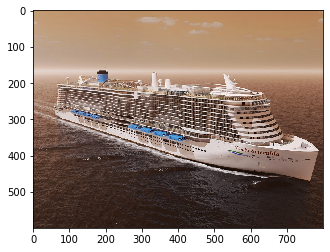

In [28]:
_predict('https://www.ship-technology.com/wp-content/uploads/sites/16/2019/10/Costa-Smeralda-Main.jpg',
        'cruise.jpg')

Shape of Image before reprocessing:  (558, 835, 3)
Shape after resizing:  (32, 32, 3)


'FROG'

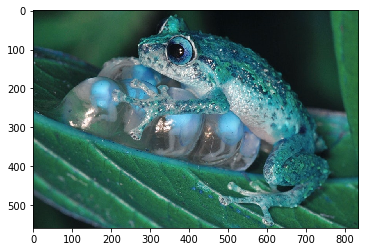

In [29]:
_predict('https://cosmos-images2.imgix.net/file/spina/photo/19180/190603_frog_fungus_full.jpg?ixlib=rails-2.1.4&auto=format&ch=Width%2CDPR&fit=max&w=835',
         'frog_1.jpg')

Shape of Image before reprocessing:  (466, 466, 3)
Shape after resizing:  (32, 32, 3)


'TRUCK'

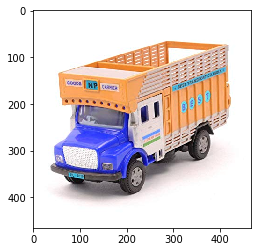

In [31]:
_predict('https://images-na.ssl-images-amazon.com/images/I/61u%2BNKkFnmL._SX466_.jpg',
         'truck.jpg')